### Synthetic data included:
- **allergies**
- careplans
- **conditions**
- **devices**
- **encounters**
- imaging_studies
- **immunizations**
- **medications**
- **observations**
- organizations
- **patients**
- payer_transitions
- payers
- **procedures**
- providers
- supplies



**NOTE: data is selected in relation to N3C similarity and current pipeline development**

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Conditions (Conditions)

In [2]:
df_conditions = pd.read_csv('../../synthea-sample-data/data/10k_synthea_covid19_csv/conditions.csv')
df_conditions

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,2019-02-15,2019-08-01,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,d5ee30a9-362f-429e-a87a-ee38d999b0a5,65363002,Otitis media
1,2019-10-30,2020-01-30,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,8bca6d8a-ab80-4cbf-8abb-46654235f227,65363002,Otitis media
2,2020-03-01,2020-03-30,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,681c380b-3c84-4c55-80a6-db3d9ea12fee,386661006,Fever (finding)
3,2020-03-01,2020-03-01,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,681c380b-3c84-4c55-80a6-db3d9ea12fee,840544004,Suspected COVID-19
4,2020-03-01,2020-03-30,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,681c380b-3c84-4c55-80a6-db3d9ea12fee,840539006,COVID-19
...,...,...,...,...,...,...
114539,2020-03-04,2020-04-01,2712205f-755e-4897-acb3-926895b7d635,a18d0f16-bc12-4897-8844-8c3ebc2464fc,248595008,Sputum finding (finding)
114540,2020-03-04,2020-04-01,2712205f-755e-4897-acb3-926895b7d635,a18d0f16-bc12-4897-8844-8c3ebc2464fc,68962001,Muscle pain (finding)
114541,2020-03-04,2020-04-01,2712205f-755e-4897-acb3-926895b7d635,a18d0f16-bc12-4897-8844-8c3ebc2464fc,57676002,Joint pain (finding)
114542,2020-03-04,2020-03-04,2712205f-755e-4897-acb3-926895b7d635,a18d0f16-bc12-4897-8844-8c3ebc2464fc,840544004,Suspected COVID-19


In [3]:
df_conditions = df_conditions.convert_dtypes()
print(df_conditions.dtypes)
df_conditions.isnull().sum()

START          string
STOP           string
PATIENT        string
ENCOUNTER      string
CODE            Int64
DESCRIPTION    string
dtype: object


START              0
STOP           51448
PATIENT            0
ENCOUNTER          0
CODE               0
DESCRIPTION        0
dtype: int64

In [4]:
df_conditions[['START','STOP']] = df_conditions[['START','STOP']].apply(pd.to_datetime)
df_conditions.dtypes

START          datetime64[ns]
STOP           datetime64[ns]
PATIENT                string
ENCOUNTER              string
CODE                    Int64
DESCRIPTION            string
dtype: object

### Looking into code vs. description (1:1?)

In [5]:
cols = ['CODE', 'DESCRIPTION']
cond = df_conditions[cols].drop_duplicates()
cond

,CODE,DESCRIPTION
0,65363002,Otitis media
2,386661006,Fever (finding)
3,840544004,Suspected COVID-19
4,840539006,COVID-19
5,44465007,Sprain of ankle
...,...,...
51102,60951000119105,Blindness due to type 2 diabetes mellitus (dis...
53205,698423002,History of disarticulation at wrist (situation)
61783,427089005,Male Infertility
75215,65275009,Acute Cholecystitis


In [6]:
print(cond['CODE'].nunique())
cond['DESCRIPTION'].nunique()

178


180

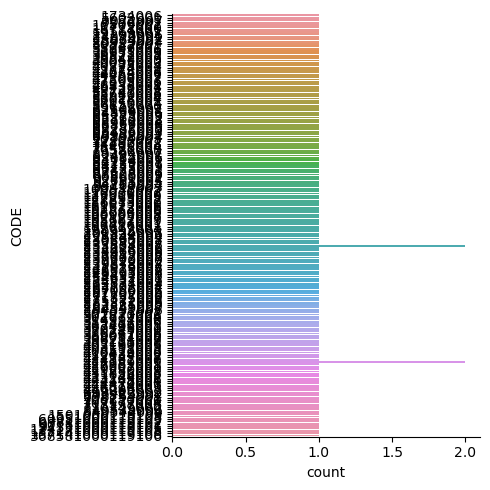

In [7]:
sns.catplot(data=cond, y = 'CODE', kind = 'count')

C:\Users\Mirna Elizondo\anaconda3\envs\condaEnv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


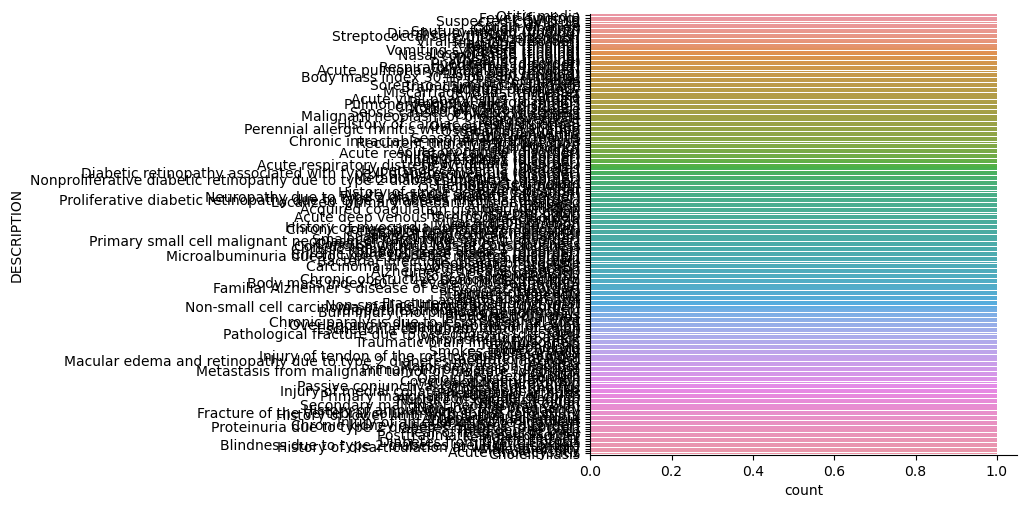

In [8]:
sns.catplot(data=cond, y = 'DESCRIPTION', kind = 'count')

**What does this tell us?**
- Bad graphs but we can see that 2 codes are used twice meaning that the code and descriptions may not be 1 to 1 but using Code will cover all conditions
- Description will still be utilized as described below

### Looking into 178 conditions

In [9]:
cols = ['START', 'STOP', 'CODE', 'DESCRIPTION']
cond = df_conditions[cols]
cond

,START,STOP,CODE,DESCRIPTION
0,2019-02-15,2019-08-01,65363002,Otitis media
1,2019-10-30,2020-01-30,65363002,Otitis media
2,2020-03-01,2020-03-30,386661006,Fever (finding)
3,2020-03-01,2020-03-01,840544004,Suspected COVID-19
4,2020-03-01,2020-03-30,840539006,COVID-19
...,...,...,...,...
114539,2020-03-04,2020-04-01,248595008,Sputum finding (finding)
114540,2020-03-04,2020-04-01,68962001,Muscle pain (finding)
114541,2020-03-04,2020-04-01,57676002,Joint pain (finding)
114542,2020-03-04,2020-03-04,840544004,Suspected COVID-19


In [10]:
diff = (cond['STOP'] - cond['START']).dt.days
cond['DURATION'] = diff
cond = cond.drop(['START', 'STOP'], axis=1)
cond['DURATION'].fillna(0, inplace =True)

C:\Users\Mirna Elizondo\AppData\Local\Temp\ipykernel_17256\2683235365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cond['DURATION'] = diff


In [11]:
cond = cond.drop_duplicates()
cond.sort_values(by=['DURATION'], ascending= False)


,CODE,DESCRIPTION,DURATION
106651,79586000,Tubal pregnancy,9758.0
7070,40055000,Chronic sinusitis (disorder),8585.0
23991,40055000,Chronic sinusitis (disorder),8355.0
71392,79586000,Tubal pregnancy,8197.0
10810,40055000,Chronic sinusitis (disorder),7012.0
...,...,...,...
134,233678006,Childhood asthma,0.0
3804,314994000,Metastasis from malignant tumor of prostate (d...,0.0
3655,267060006,Diarrhea symptom (finding),0.0
3541,95417003,Primary fibromyalgia syndrome,0.0


In [12]:
cond.describe()

,CODE,DURATION
count,1320.0,1320.000000
mean,2238087099915.234863,211.218939
std,18631298176656.664062,909.319561
min,1734006.0,0.000000
25%,59253250.25,11.000000
50%,79586000.0,24.000000
75%,267060006.0,43.000000
max,368581000119106.0,9758.000000


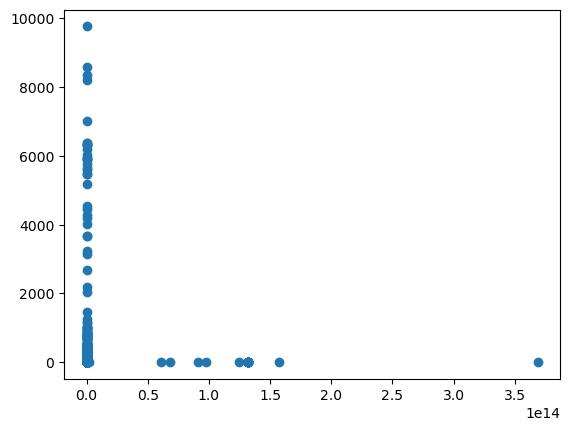

In [13]:
plt.scatter(cond['CODE'],cond['DURATION'])

In [14]:
n=25
print('List of 25 values:')
top25 = cond['CODE'].value_counts()[:n].index.tolist()
print(top25)

List of 25 values:
[65363002, 25064002, 57676002, 68962001, 43724002, 56018004, 267036007, 36955009, 249497008, 267102003, 84229001, 422587007, 386661006, 248595008, 49727002, 840539006, 267060006, 68235000, 246677007, 68496003, 66857006, 36971009, 75498004, 40055000, 72892002]


C:\Users\Mirna Elizondo\AppData\Local\Temp\ipykernel_17256\2292483864.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  top25 = cond['CODE'].value_counts()[:n].index.tolist()


In [15]:
top25 = df_conditions.loc[(df_conditions['CODE'].isin(top25))]
top25 = top25.drop(['START', 'STOP'], axis=1)
top25

,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,d5ee30a9-362f-429e-a87a-ee38d999b0a5,65363002,Otitis media
1,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,8bca6d8a-ab80-4cbf-8abb-46654235f227,65363002,Otitis media
2,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,681c380b-3c84-4c55-80a6-db3d9ea12fee,386661006,Fever (finding)
4,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,681c380b-3c84-4c55-80a6-db3d9ea12fee,840539006,COVID-19
6,067318a4-db8f-447f-8b6e-f2f61e9baaa5,1ea74a77-3ad3-4948-a9cc-3084462035d6,49727002,Cough (finding)
...,...,...,...,...
114538,2712205f-755e-4897-acb3-926895b7d635,a18d0f16-bc12-4897-8844-8c3ebc2464fc,49727002,Cough (finding)
114539,2712205f-755e-4897-acb3-926895b7d635,a18d0f16-bc12-4897-8844-8c3ebc2464fc,248595008,Sputum finding (finding)
114540,2712205f-755e-4897-acb3-926895b7d635,a18d0f16-bc12-4897-8844-8c3ebc2464fc,68962001,Muscle pain (finding)
114541,2712205f-755e-4897-acb3-926895b7d635,a18d0f16-bc12-4897-8844-8c3ebc2464fc,57676002,Joint pain (finding)


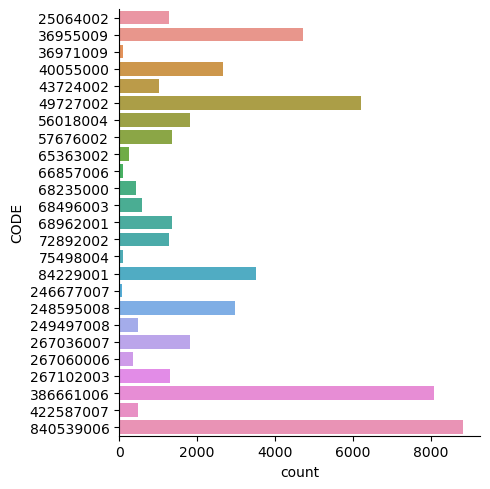

In [16]:
sns.catplot(data=top25, y = 'CODE', kind = 'count')

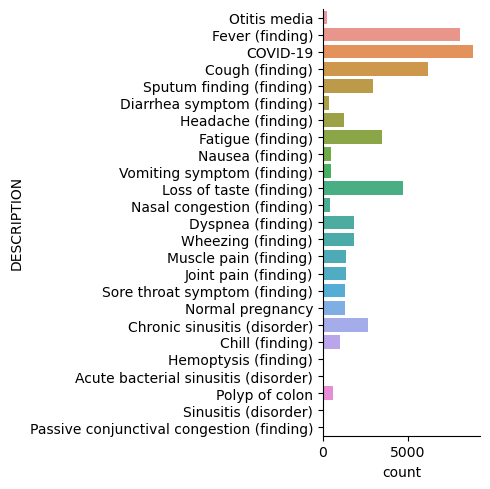

In [17]:
sns.catplot(data=top25, y = 'DESCRIPTION', kind = 'count')

**What does this tell us?**

- Similar to the N3C data looking at the descriptions gives us insight that multiple conditions can be related, by looking at the code we wouldnt be able to tell that 233604007-Pneumonia (disorder) is assumed to be same as 236077008-Pneumonia
- The conditions will need to be grouped to include all the variations of the names
- Although the codes are linked to the OMOP common model, we aim to find the most common conditions that occurred 
    - after patient was reported with a 'COVID-19 related conditions'
    - to deceased patients since 2021 (COVID-19 Pandemic)
    - to patients who were reported with 'COVID-19 related conditions' and died
    

In [18]:
print('List of 25-50 values:')
top25_50 = cond['CODE'].value_counts()[25:50].index.tolist()
print(top25_50)
top25Cond = df_conditions.loc[(df_conditions['CODE'].isin(top25_50))]
top25Cond = top25Cond.drop(['START', 'STOP'], axis=1)

List of 25-50 values:
[301011002, 192127007, 233604007, 38822007, 79586000, 271825005, 132281000119108, 770349000, 65710008, 706870000, 233678006, 109838007, 195662009, 43878008, 234466008, 84114007, 444814009, 40275004, 398254007, 713197008, 65966004, 67782005, 58150001, 271737000, 10509002]


C:\Users\Mirna Elizondo\AppData\Local\Temp\ipykernel_17256\1547309323.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  top25_50 = cond['CODE'].value_counts()[25:50].index.tolist()


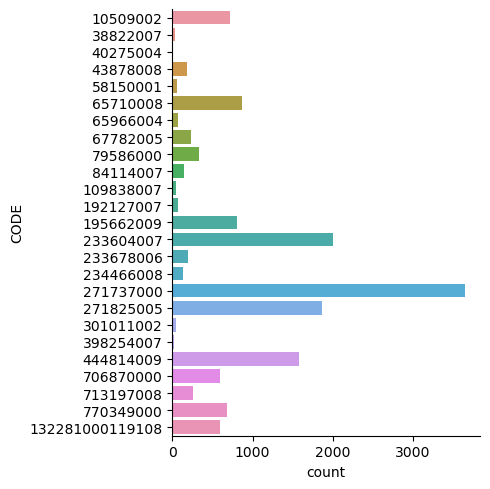

In [19]:
sns.catplot(data=top25Cond, y = 'CODE', kind = 'count')

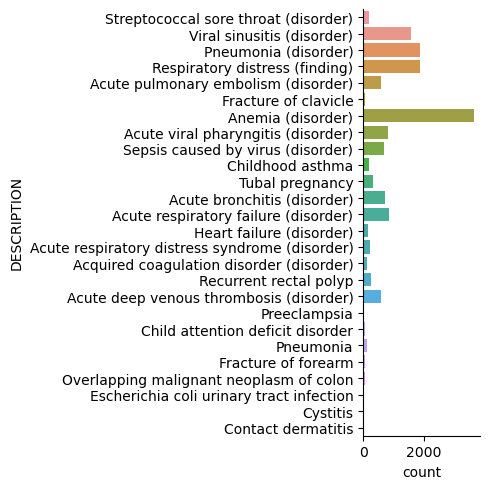

In [20]:
sns.catplot(data=top25Cond, y = 'DESCRIPTION', kind = 'count')

In [21]:
print('List of 50-75 values:')
top50_75 = cond['CODE'].value_counts()[50:75].index.tolist()
print(top50_75)
top50Cond = df_conditions.loc[(df_conditions['CODE'].isin(top50_75))]
top50Cond = top50Cond.drop(['START', 'STOP'], axis=1)

List of 50-75 values:
[403190006, 86175003, 363406005, 44465007, 70704007, 24079001, 16114001, 198992004, 443165006, 39848009, 307731004, 403191005, 33737001, 239720000, 93761005, 359817006, 263102004, 446096008, 40095003, 62106007, 62564004, 370247008, 284549007, 156073000, 444470001]


C:\Users\Mirna Elizondo\AppData\Local\Temp\ipykernel_17256\690149920.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  top50_75 = cond['CODE'].value_counts()[50:75].index.tolist()


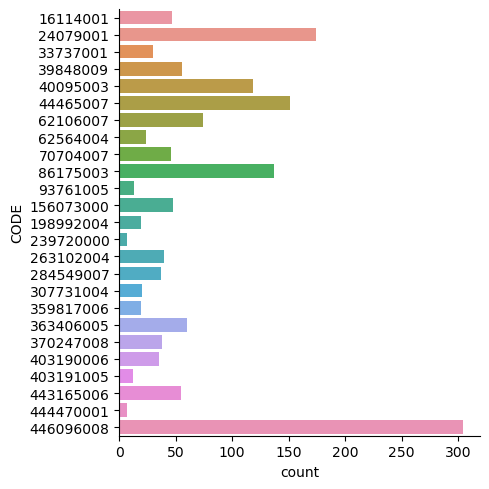

In [22]:
sns.catplot(data=top50Cond, y = 'CODE', kind = 'count')

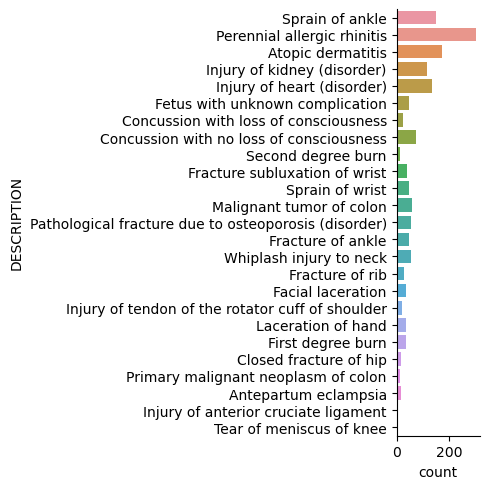

In [23]:
sns.catplot(data=top50Cond, y = 'DESCRIPTION', kind = 'count')

In [24]:
print('List of 75-100 values:')
top75_100 = cond['CODE'].value_counts()[75:100].index.tolist()
print(top75_100)
top75Cond = df_conditions.loc[(df_conditions['CODE'].isin(top75_100))]
top75Cond = top75Cond.drop(['START', 'STOP'], axis=1)

List of 75-100 values:
[283385000, 283371005, 284551006, 262574004, 403192003, 110030002, 444448004, 30832001, 35999006, 427089005, 241929008, 232353008, 69896004, 840544004, 698423002, 127295002, 60951000119105, 6072007, 65275009, 90560007, 236077008, 698754002, 200936003, 7200002, 83664006]


C:\Users\Mirna Elizondo\AppData\Local\Temp\ipykernel_17256\2019739477.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  top75_100 = cond['CODE'].value_counts()[75:100].index.tolist()


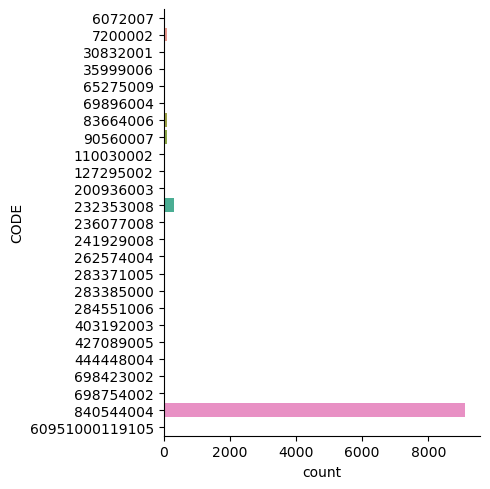

In [25]:
sns.catplot(data=top75Cond, y = 'CODE', kind = 'count')

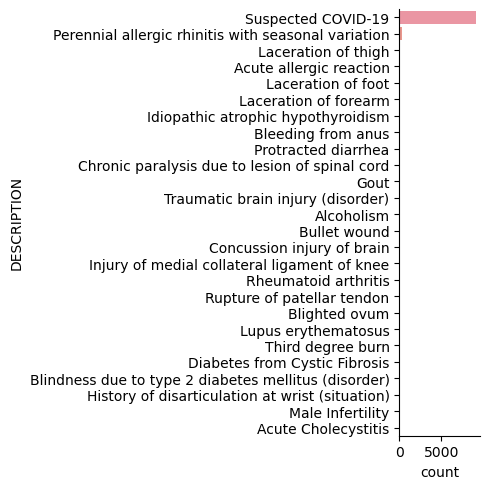

In [26]:
sns.catplot(data=top75Cond, y = 'DESCRIPTION', kind = 'count')

In [27]:
print('List of 100-125 values:')
top100_125 = cond['CODE'].value_counts()[100:125].index.tolist()
print(top100_125)
top100Cond = df_conditions.loc[(df_conditions['CODE'].isin(top100_125))]
top100Cond = top100Cond.drop(['START', 'STOP'], axis=1)

List of 100-125 values:
[161622006, 1734006, 433144002, 429280009, 157141000119108, 47200007, 94260004, 225444004, 5602001, 449868002, 47505003, 314994000, 707577004, 190905008, 95417003, 370143000, 195967001, 97331000119101, 48333001, 92691004, 424132000, 367498001, 64859006, 389087006, 196416002]


C:\Users\Mirna Elizondo\AppData\Local\Temp\ipykernel_17256\2037926614.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  top100_125 = cond['CODE'].value_counts()[100:125].index.tolist()


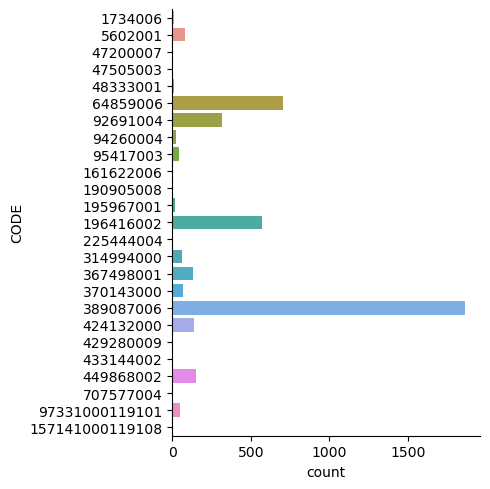

In [28]:
sns.catplot(data=top100Cond, y = 'CODE', kind = 'count')

C:\Users\Mirna Elizondo\anaconda3\envs\condaEnv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


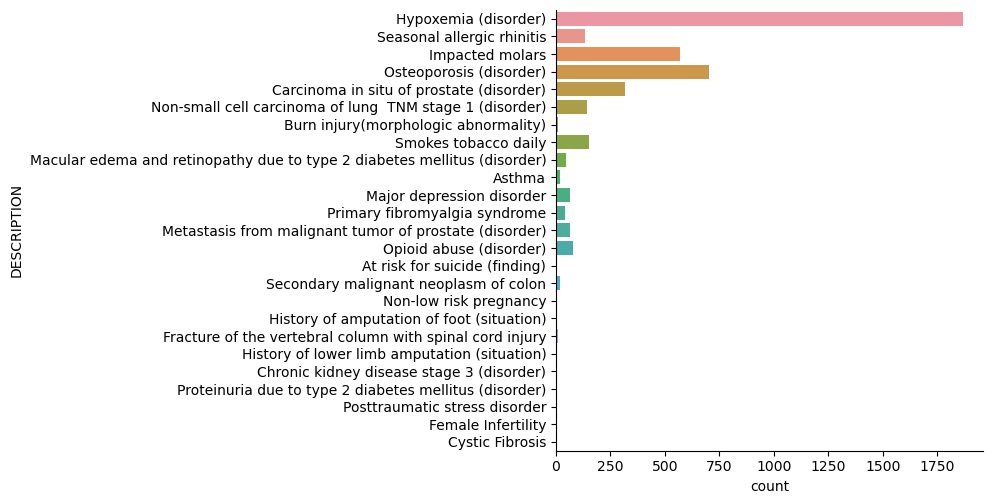

In [29]:
sns.catplot(data=top100Cond, y = 'DESCRIPTION', kind = 'count')

In [30]:
print('List of 125-150 values:')
top125_150 = cond['CODE'].value_counts()[125:150].index.tolist()
print(top125_150)
top125Cond = df_conditions.loc[(df_conditions['CODE'].isin(top125_150))]
top125Cond = top125Cond.drop(['START', 'STOP'], axis=1)

List of 125-150 values:
[1551000119108, 237602007, 80394007, 422034002, 302870006, 44054006, 76571007, 197927001, 124171000119105, 55822004, 254637007, 239872002, 239873007, 429007001, 410429000, 55680006, 254837009, 53741008, 87433001, 230690007, 19169002, 162864005, 275272006, 128613002, 703151001]


C:\Users\Mirna Elizondo\AppData\Local\Temp\ipykernel_17256\1616577442.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  top125_150 = cond['CODE'].value_counts()[125:150].index.tolist()


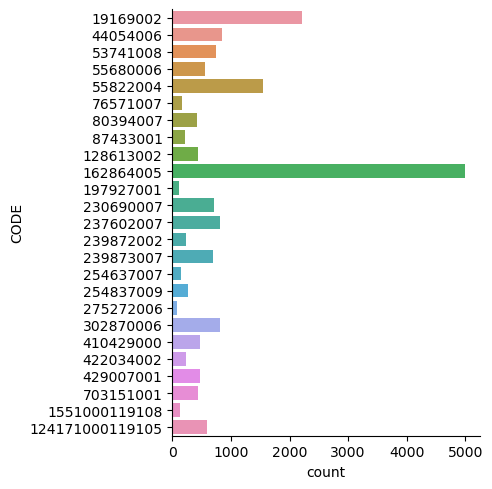

In [31]:
sns.catplot(data=top125Cond, y = 'CODE', kind = 'count')

C:\Users\Mirna Elizondo\anaconda3\envs\condaEnv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


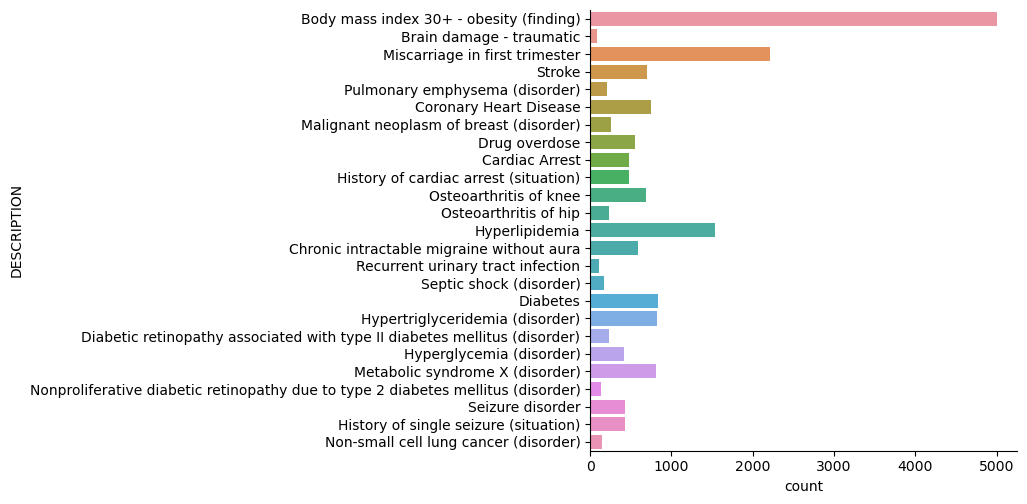

In [32]:
sns.catplot(data=top125Cond, y = 'DESCRIPTION', kind = 'count')

In [33]:
print('List of 150-178 values:')
top150_178 = cond['CODE'].value_counts()[150:178].index.tolist()
print(top150_178)
top150Cond = df_conditions.loc[(df_conditions['CODE'].isin(top150_178))]
top150Cond = top150Cond.drop(['START', 'STOP'], axis=1)

List of 150-178 values:
[368581000119106, 1501000119109, 47693006, 230265002, 408512008, 185086009, 428251008, 74400008, 26929004, 15777000, 126906006, 87628006, 82423001, 90781000119102, 431856006, 127013003, 431855005, 67811000119102, 254632001, 162573006, 59621000, 88805009, 399211009, 22298006, 49436004, 84757009, 201834006, 235919008]


C:\Users\Mirna Elizondo\AppData\Local\Temp\ipykernel_17256\1454445504.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  top150_178 = cond['CODE'].value_counts()[150:178].index.tolist()


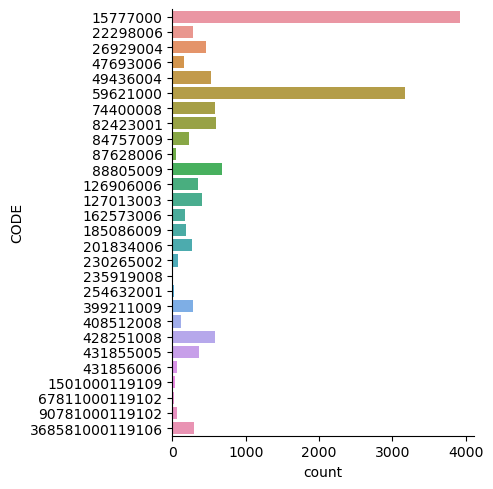

In [34]:
sns.catplot(data=top150Cond, y = 'CODE', kind = 'count')

C:\Users\Mirna Elizondo\anaconda3\envs\condaEnv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


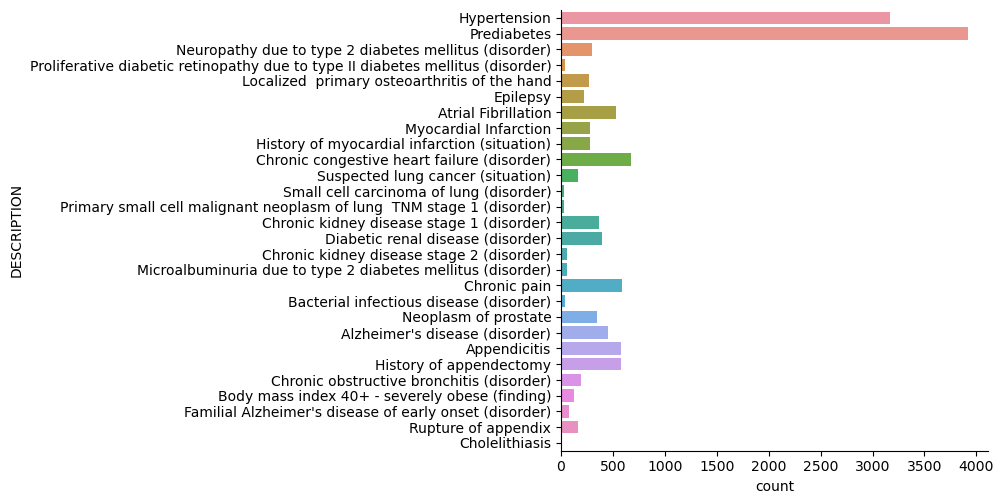

In [35]:
sns.catplot(data=top150Cond, y = 'DESCRIPTION', kind = 'count')

In [36]:
zero = cond.loc[(cond['DURATION'] == 0)]
zero.describe()

,CODE,DURATION
count,175.0,175.0
mean,6297917072067.485352,0.0
std,34950977019434.617188,0.0
min,1734006.0,0.0
25%,67319505.5,0.0
50%,198992004.0,0.0
75%,370195004.0,0.0
max,368581000119106.0,0.0


In [37]:
#pd.set_option('display.max_rows', None)
zero

,CODE,DESCRIPTION,DURATION
3,840544004,Suspected COVID-19,0.0
13,59621000,Hypertension,0.0
44,389087006,Hypoxemia (disorder),0.0
57,162864005,Body mass index 30+ - obesity (finding),0.0
58,15777000,Prediabetes,0.0
...,...,...,...
75215,65275009,Acute Cholecystitis,0.0
75216,235919008,Cholelithiasis,0.0
80618,307731004,Injury of tendon of the rotator cuff of shoulder,0.0
91603,40275004,Contact dermatitis,0.0


In [38]:
lessThan25 = cond.loc[(cond['DURATION'] < 25) & (cond['DURATION'] != 0)]
lessThan25.describe()

,CODE,DURATION
count,503.0,503.000000
mean,3681993253478.723633,14.600398
std,21781076327299.847656,5.571463
min,10509002.0,1.000000
25%,65363002.0,10.000000
50%,233604007.0,14.000000
75%,271825005.0,19.500000
max,132281000119108.0,24.000000


In [39]:
lessThan25

,CODE,DESCRIPTION,DURATION
5,44465007,Sprain of ankle,14.0
12,43878008,Streptococcal sore throat (disorder),10.0
14,444814009,Viral sinusitis (disorder),7.0
29,840544004,Suspected COVID-19,1.0
31,68235000,Nasal congestion (finding),16.0
...,...,...,...
101790,40095003,Injury of kidney (disorder),3.0
102870,66857006,Hemoptysis (finding),21.0
106190,246677007,Passive conjunctival congestion (finding),22.0
109274,246677007,Passive conjunctival congestion (finding),15.0


In [40]:
moreThan25 = cond.loc[(cond['DURATION'] >= 25) & (cond['DURATION'] != 0)]
moreThan25.describe()

,CODE,DURATION
count,642.0,642.000000
mean,150899963.398754,422.842679
std,160944965.346744,1270.455719
min,16114001.0,25.000000
25%,57676002.0,31.250000
50%,68496003.0,48.500000
75%,248595008.0,203.000000
max,840539006.0,9758.000000


In [41]:
moreThan25

,CODE,DESCRIPTION,DURATION
0,65363002,Otitis media,167.0
1,65363002,Otitis media,92.0
2,386661006,Fever (finding),29.0
4,840539006,COVID-19,29.0
6,49727002,Cough (finding),32.0
...,...,...,...
111668,65363002,Otitis media,426.0
112026,65363002,Otitis media,238.0
112154,79586000,Tubal pregnancy,5173.0
112979,65363002,Otitis media,188.0
